In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/low_tyr_half_real_delta_scores.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [6]:
len(df_general)

2074070

In [7]:
df_general

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37
0,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000233556402/placements/7l1u_receptor_only_PV-000233556402_137_1.pdb,-12.813721,-9.952560,-2.861161,8.0,10.0,-2.0,0,0,0.0,0.625,0.200000,0.425000,1,0,1.0,-0.81776,0.0,-0.81776,100,100,0.0,0,0,0.0,0,0,0.0,95.993519,100.247440,-4.253921,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,2.754961,0.2,NaN
1,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000233556402/placements/7l1u_receptor_only_PV-000233556402_210_1.pdb,-12.813721,-9.387874,-3.425847,8.0,12.0,-4.0,0,0,0.0,0.625,0.416667,0.208333,1,0,1.0,-0.81776,0.0,-0.81776,100,100,0.0,0,0,0.0,0,0,0.0,95.993519,103.028793,-7.035274,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,3.464361,0.2,NaN
2,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000233556402/placements/7l1u_receptor_only_PV-000233556402_137_0.pdb,-12.813721,-9.568417,-3.245304,8.0,11.0,-3.0,0,0,0.0,0.625,0.090909,0.534091,1,0,1.0,-0.81776,0.0,-0.81776,100,100,0.0,0,0,0.0,0,0,0.0,95.993519,101.522492,-5.528973,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,2.913275,0.2,NaN
3,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000233556402/placements/7l1u_receptor_only_PV-000233556402_148_0.pdb,-12.813721,-14.352344,1.538623,8.0,11.0,-3.0,0,0,0.0,0.625,0.090909,0.534091,1,0,1.0,-0.81776,0.0,-0.81776,100,100,0.0,0,0,0.0,0,0,0.0,95.993519,96.738565,-0.745046,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,6.495403,0.4,NaN
4,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_ty

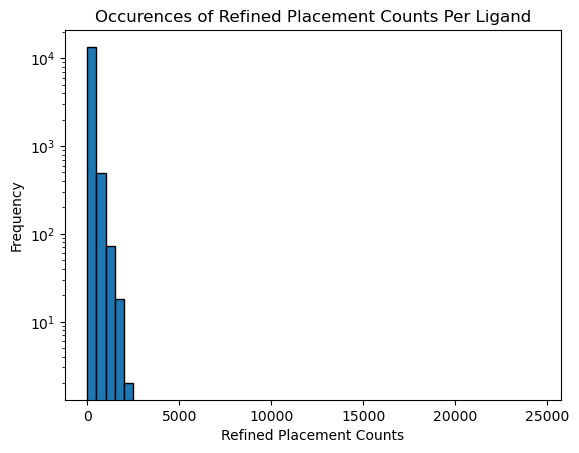

In [8]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_general['file_initial'].value_counts()

bin_edges = np.arange(0, 25000, 500)

plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Refined Placement Counts')
plt.ylabel('Frequency')
plt.title('Occurences of Refined Placement Counts Per Ligand')

# Show the plot
plt.show()

In [9]:
# Extract ligand names using a regular expression
df_general['ligand_name'] = df_general['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands_general = df_general['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 11355


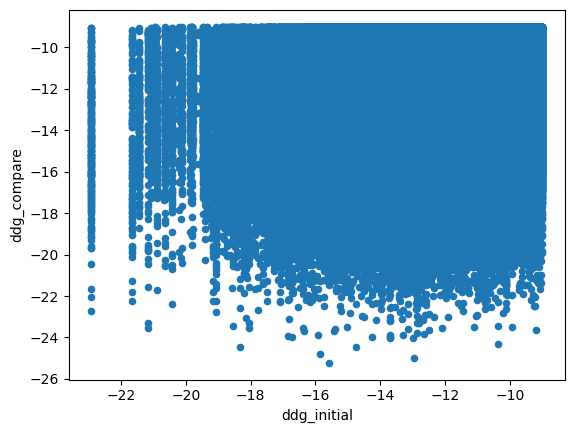

In [10]:
df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
plt.show()

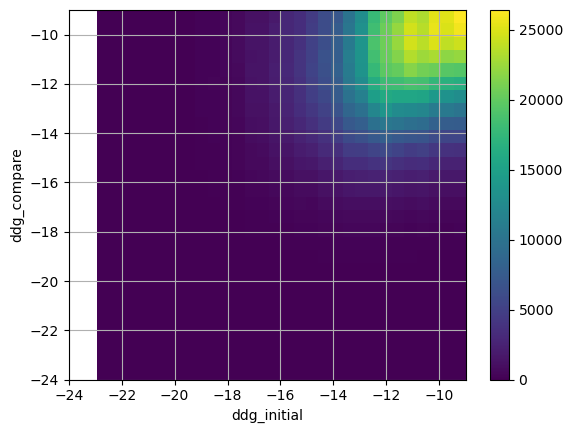

In [11]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

#plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')

plt.colorbar()

plt.ylim(-24,-9)
plt.xlim(-24,-9)

plt.grid(True)
plt.show()

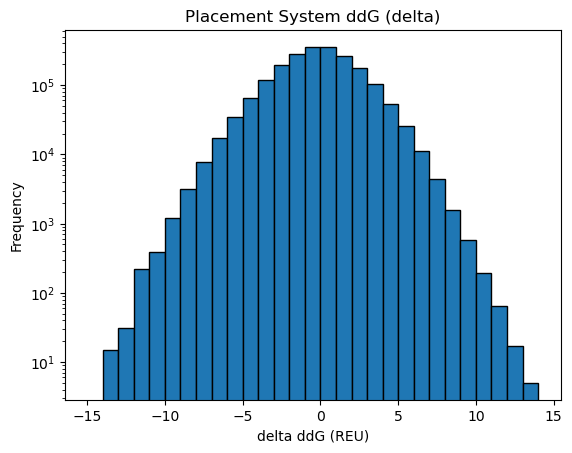

In [12]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-15, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

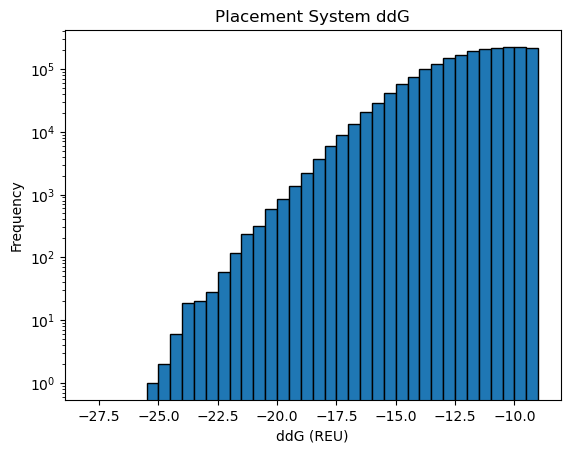

In [13]:
#plot the delta ddg in histogram
x = df_general['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

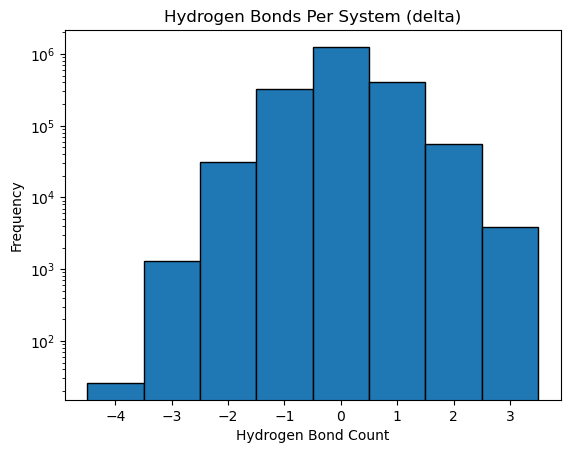

In [14]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

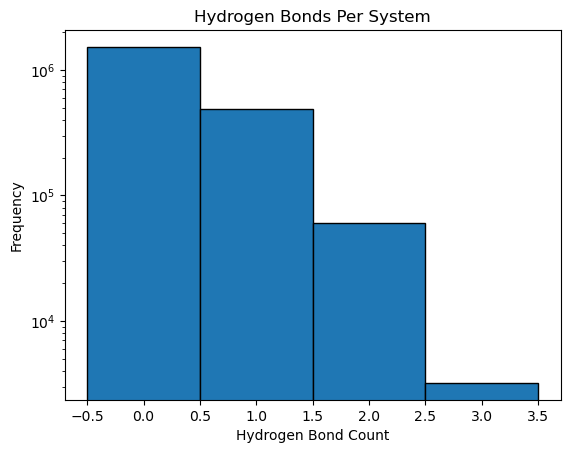

In [15]:
#plot the delta ddg in histogram
x = df_general['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

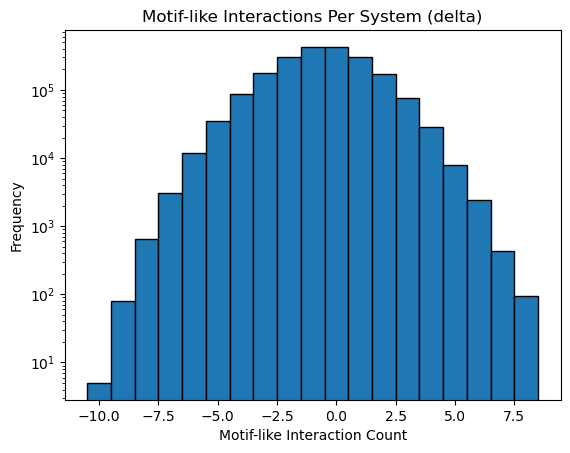

In [16]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

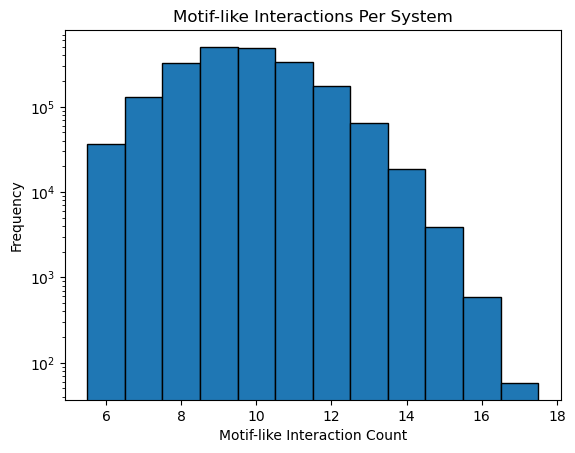

In [17]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

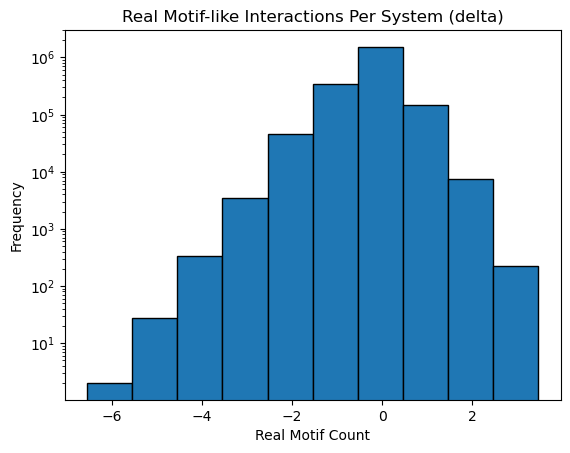

In [18]:
#plot the delta ddg in histogram
x = df_general['total_motifs_delta'] * df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

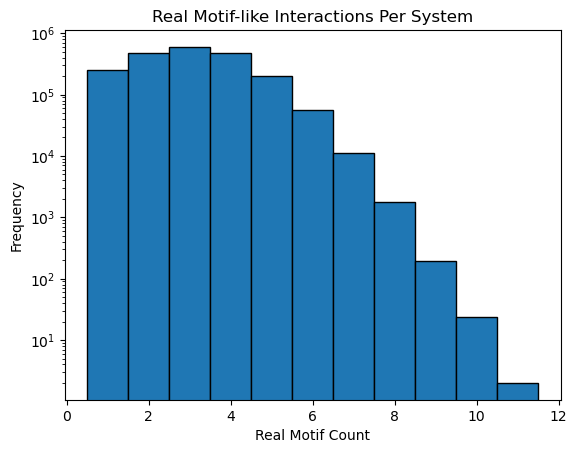

In [19]:
#plot the delta ddg in histogram
x = df_general['total_motifs_compare'] * df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

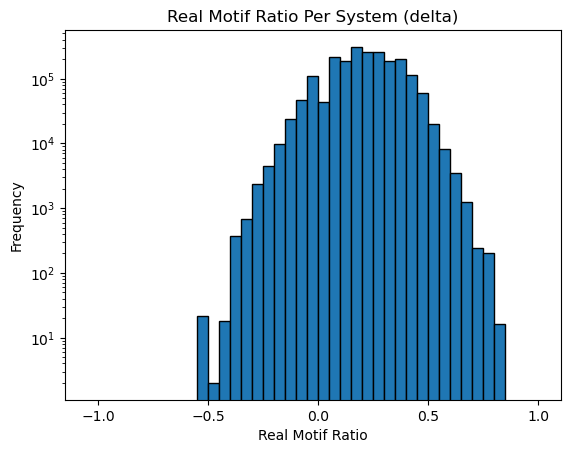

In [20]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

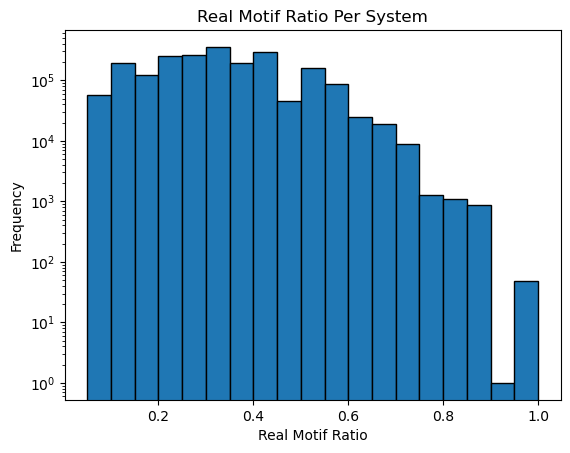

In [21]:
#plot the delta ddg in histogram
x = df_general['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

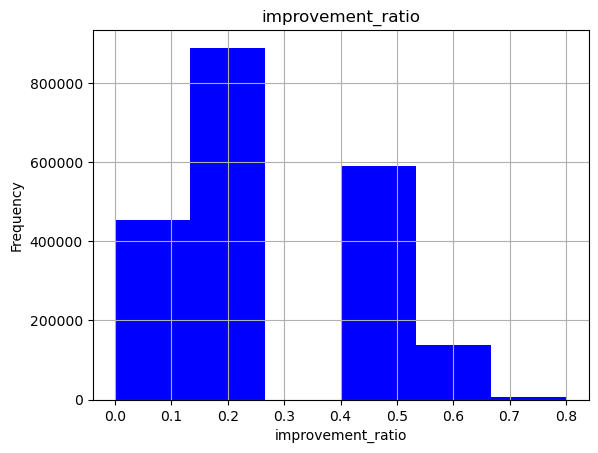

In [22]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [64]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 4) & (df_general['real_motif_ratio_compare'] >= 0.25) & (df_general['ddg_delta'] > 0) & (df_general['ddg_compare'] <= -15)]

In [65]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
610,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000245631141/placements/7l1u_receptor_only_PV-000245631141_124_0.pdb,-11.400800,-15.663225,4.262425,8.0,11.0,-3.0,0,0,0.0,0.500000,0.272727,0.227273,0,3,-3.0,0.000000,-1.823431,1.823431,100,100,0.0,0,0,0.0,0,0,0.0,97.099200,96.786071,0.313129,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,2.841641,0.6,NaN,PV-000245631141
4607,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_63_2.pdb,-15.218895,-16.560445,1.341550,11.0,10.0,1.0,0,0,0.0,0.545455,0.400000,0.145455,2,3,-1.0,-0.890434,-1.326592,0.436158,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,95.512963,1.923163,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,2.582274,0.4,NaN,PV-000352087258
4623,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_93_3.pdb,-15.218895,-17.136100,1.917205,11.0,10.0,1.0,0,0,0.0,0.545455,0.300000,0.245455,2,3,-1.0,-0.890434,-1.624886,0.734452,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,94.539014,2.897112,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,1.409874,0.4,NaN,PV-000352087258
4635,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_136_4.pdb,-15.218895,-15.300858,0.081963,11.0,13.0,-2.0,0,0,0.0,0.545455,0.307692,0.237763,2,3,-1.0,-0.890434,-0.964363,0.073929,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,100.042471,-2.606345,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,1.718867,0.6,NaN,PV-000352087258
5758,/data/project/thymelab/triad_p

In [66]:
len(df_general_filtered)

491

In [67]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [68]:
df_general_filtered_lite

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
35,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000233556402/placements/7l1u_receptor_only_PV-000233556402_200_0.pdb,-12.813721,-13.126886,0.313165,8.0,8.0,0.0,0,0,0.0,0.625000,0.500000,0.125000,1,0,1.0,-0.81776,0.000000,-0.817760,100,100,0.0,0,0,0.0,0,0,0.0,95.993519,95.373114,0.620405,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10147/placements/7l1u_receptor_only_PV-000233556402_7_1.pdb,2.498434,0.2,NaN,PV-000233556402
87,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000234943776/placements/7l1u_receptor_only_PV-000234943776_28_8.pdb,-11.299980,-13.870740,2.570760,9.0,9.0,0.0,0,0,0.0,0.555556,0.555556,0.000000,0,1,-1.0,0.00000,-0.642157,0.642157,100,100,0.0,0,0,0.0,0,0,0.0,98.255576,96.042659,2.212917,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,2.570131,0.4,NaN,PV-000234943776
95,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000234943776/placements/7l1u_receptor_only_PV-000234943776_71_0.pdb,-11.299980,-13.243522,1.943542,9.0,10.0,-1.0,0,0,0.0,0.555556,0.500000,0.055556,0,1,-1.0,0.00000,-0.409045,0.409045,100,100,0.0,0,0,0.0,0,0,0.0,98.255576,97.847433,0.408143,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,3.100075,0.6,NaN,PV-000234943776
104,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000234943776/placements/7l1u_receptor_only_PV-000234943776_8_0.pdb,-11.299980,-11.403179,0.103199,9.0,10.0,-1.0,0,0,0.0,0.555556,0.500000,0.055556,0,0,0.0,0.00000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,98.255576,99.096821,-0.841245,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/11724/placements/7l1u_receptor_only_PV-000234943776_9_0.pdb,3.201181,0.4,NaN,PV-000234943776
113,/data/project/thymelab/triad_pulldown_tyr2

In [69]:
len(df_general_filtered_lite)

300561

In [70]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [71]:
len(df_recoveries)

49964

In [72]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [73]:
len(closest_recovery_general_df)

14047

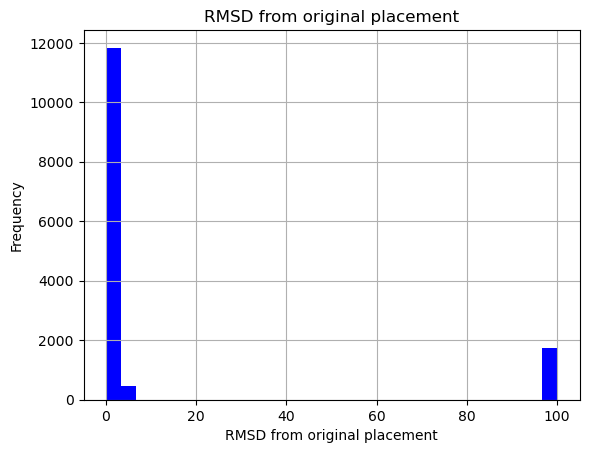

In [74]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('RMSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [75]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

12093

In [76]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.8608955648893002

In [77]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
1243826,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z1897503385_6_7.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/Z1897503385/placements/7l1u_receptor_only_Z1897503385_94_11.pdb,-13.804466,-14.596371,0.791905,8.0,8.0,0.0,0,0,0.0,0.500000,0.500000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,94.695534,93.903629,0.791905,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z1897503385_6_7.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z1897503385_6_7.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z1897503385_6_7.pdb,1.242151,0.2,NaN,Z1897503385
1495965,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z2763295832_3_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/Z2763295832/placements/7l1u_receptor_only_Z2763295832_1_0.pdb,-12.111809,-11.128527,-0.983282,8.0,11.0,-3.0,0,0,0.0,0.500000,0.181818,0.318182,1,0,1.0,-0.031655,0.000000,-0.031655,100,100,0.0,0,0,0.0,0,0,0.0,97.356536,100.053291,-2.696755,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z2763295832_3_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z2763295832_3_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z2763295832_3_2.pdb,0.947951,0.2,NaN,Z2763295832
1593578,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3138367555_5_25.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/Z3138367555/placements/7l1u_receptor_only_Z3138367555_30_1.pdb,-11.204810,-10.492514,-0.712296,10.0,11.0,-1.0,0,0,0.0,0.500000,0.272727,0.227273,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,99.295190,100.780213,-1.485023,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3138367555_5_25.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3138367555_5_25.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3138367555_5_25.pdb,1.330633,0.2,NaN,Z3138367555
1780171,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3855641462_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/Z3855641462/placements/7l1u_receptor_only_Z3855641462_134_1.pdb,-9.790518,-12.552654,2.762136,8.0,8.0,0.0,0,0,0.0,0.500000,0.500000,0.000000,1,1,0.0,-0.072376,-1.098388,1.026012,100,100,0.0,0,0,0.0,0,0,0.0,99.637106,95.848958,3.788148,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3855641462_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3855641462_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3855641462_10_2.pdb,0.354291,0.2,NaN,Z3855641462
1779937,/data/project/thymelab/triad_pulldown_tyr220/10/placements/7l1u_receptor_only_Z3855641462_10_4.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/

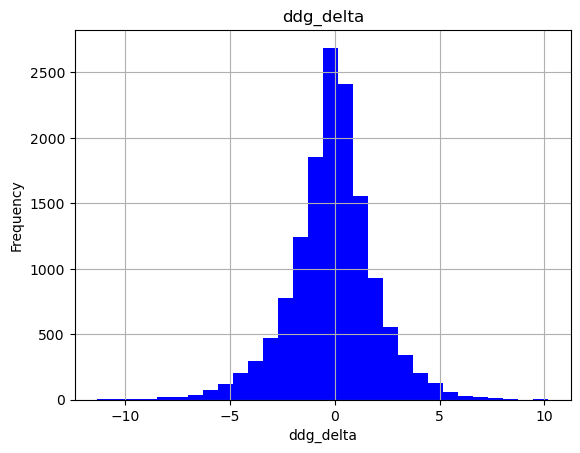

In [78]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [79]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

1954

In [80]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.13910443511069978

In [81]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
816585,/data/project/thymelab/triad_pulldown_tyr220/10004/placements/7l1u_receptor_only_PV-005597052654_3_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-005597052654/placements/7l1u_receptor_only_PV-005597052654_105_0.pdb,-11.488366,-10.716580,-0.771786,10.0,8.0,2.0,0,0,0.0,0.600000,0.125000,0.475000,1,0,1.0,-0.298024,0.000000,-0.298024,100,100,0.0,0,0,0.0,0,0,0.0,99.813610,97.408420,2.405190,/data/project/thymelab/triad_pulldown_tyr220/10004/placements/7l1u_receptor_only_PV-005597052654_3_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10004/placements/7l1u_receptor_only_PV-005597052654_3_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/10004/placements/7l1u_receptor_only_PV-005597052654_3_1.pdb,100.000000,0.0,NaN,PV-005597052654
821167,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-005629938087/placements/7l1u_receptor_only_PV-005629938087_6_0.pdb,-13.083441,-11.455140,-1.628301,10.0,11.0,-1.0,0,0,0.0,0.500000,0.454545,0.045455,1,1,0.0,-0.184624,-0.549402,0.364778,100,100,0.0,0,0,0.0,0,0,0.0,98.231935,100.450003,-2.218068,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_0.pdb,4.434582,0.2,NaN,PV-005629938087
821172,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-005629938087/placements/7l1u_receptor_only_PV-005629938087_6_0.pdb,-11.950623,-11.455140,-0.495483,10.0,11.0,-1.0,0,0,0.0,0.500000,0.454545,0.045455,1,1,0.0,-0.018898,-0.549402,0.530504,100,100,0.0,0,0,0.0,0,0,0.0,99.530479,100.450003,-0.919524,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/10044/placements/7l1u_receptor_only_PV-005629938087_6_2.pdb,4.388034,0.2,NaN,PV-005629938087
688234,/data/project/thymelab/triad_pulldown_tyr220/1007/placements/7l1u_receptor_only_PV-004993609876_11_9.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-004993609876/placements/7l1u_receptor_only_PV-004993609876_17_20.pdb,-12.854036,-9.487068,-3.366968,8.0,9.0,-1.0,0,0,0.0,0.500000,0.333333,0.166667,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,95.645964,99.846265,-4.200301,/data/project/thymelab/triad_pulldown_tyr220/1007/placements/7l1u_receptor_only_PV-004993609876_11_9.pdb,/data/project/thymelab/triad_pulldown_tyr220/1007/placements/7l1u_receptor_only_PV-004993609876_11_9.pdb,/data/project/thymelab/triad_pulldown_tyr220/1007/placements/7l1u_receptor_only_PV-004993609876_11_9.pdb,100.000000,0.2,NaN,PV-004993609876
826139,/data

In [82]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name


In [83]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
162,/data/project/thymelab/triad_pulldown_tyr220/6495/placements/7l1u_receptor_only_PV-000239732019_4_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000239732019/placements/7l1u_receptor_only_PV-000239732019_204_1.pdb,-9.322730,-12.287650,2.964920,10.0,11.0,-1.0,0,0,0.0,0.500000,0.545455,-0.045455,0,1,-1.0,0.000000,-0.004487,0.004487,100,100,0.0,0,0,0.0,0,0,0.0,101.177270,100.253318,0.923952,/data/project/thymelab/triad_pulldown_tyr220/6495/placements/7l1u_receptor_only_PV-000239732019_4_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/6495/placements/7l1u_receptor_only_PV-000239732019_4_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/6495/placements/7l1u_receptor_only_PV-000239732019_4_1.pdb,3.584239,0.8,NaN,PV-000239732019
642,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000245631141/placements/7l1u_receptor_only_PV-000245631141_144_0.pdb,-11.400800,-13.152711,1.751911,8.0,13.0,-5.0,0,0,0.0,0.500000,0.538462,-0.038462,0,1,-1.0,0.000000,-0.553431,0.553431,100,100,0.0,0,0,0.0,0,0,0.0,97.099200,100.832320,-3.733120,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,3.536465,0.8,NaN,PV-000245631141
803,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000245631142/placements/7l1u_receptor_only_PV-000245631142_7_0.pdb,-11.941909,-14.801087,2.859178,10.0,11.0,-1.0,0,0,0.0,0.500000,0.636364,-0.136364,1,2,-1.0,-0.403169,-0.931175,0.528006,100,100,0.0,0,0,0.0,0,0,0.0,99.154922,97.904102,1.250820,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_1.pdb,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_1.pdb,3.071653,0.8,NaN,PV-000245631142
923,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000245631142/placements/7l1u_receptor_only_PV-000245631142_7_0.pdb,-12.746662,-14.801087,2.054425,9.0,11.0,-2.0,0,0,0.0,0.555556,0.636364,-0.080808,0,2,-2.0,0.000000,-0.931175,0.931175,100,100,0.0,0,0,0.0,0,0,0.0,96.808894,97.904102,-1.095208,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/6789/placements/7l1u_receptor_only_PV-000245631142_8_0.pdb,2.941948,0.8,NaN,PV-000245631142
3297,/data/project/thymelab/triad_p

In [84]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -15) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


474

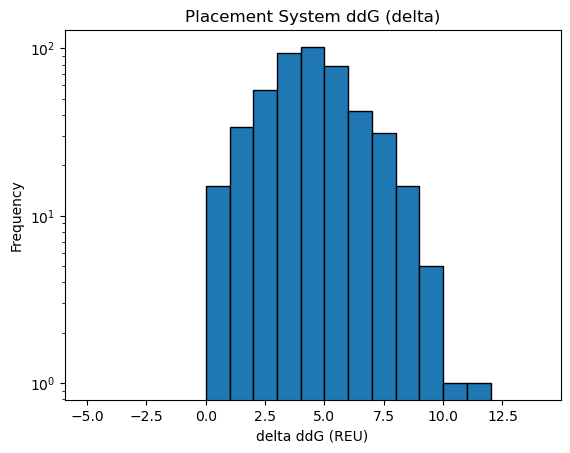

In [85]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_delta']
#set labels and title
plt.xlabel('delta ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-5, 15, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

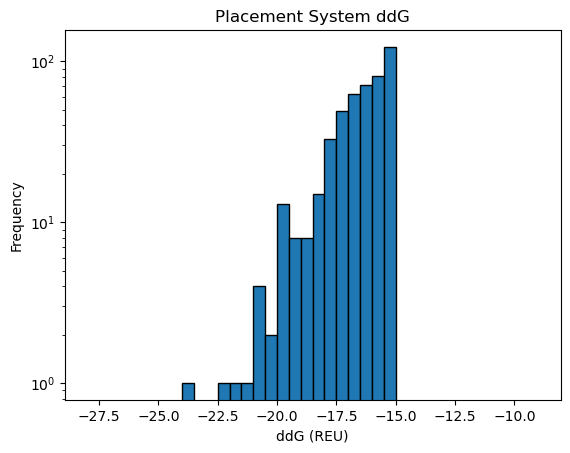

In [86]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-28, -8.5, 0.5)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

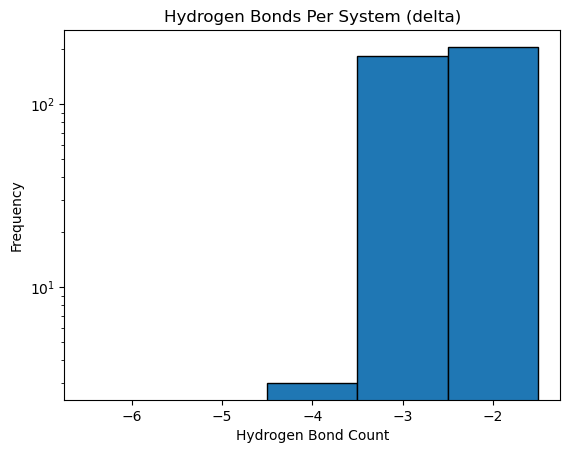

In [87]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_delta']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-6.5, -0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

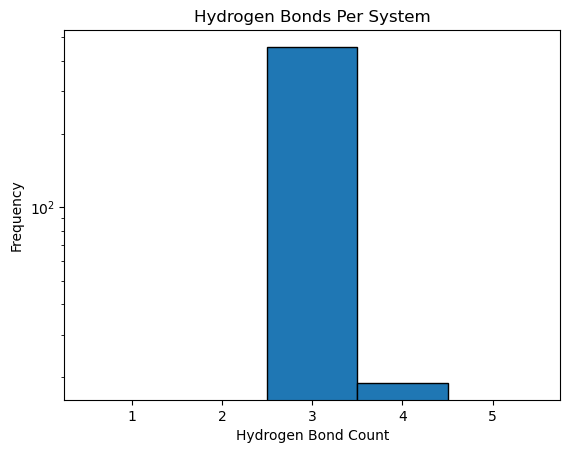

In [88]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['hbond_motif_count_compare']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.5, 6, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

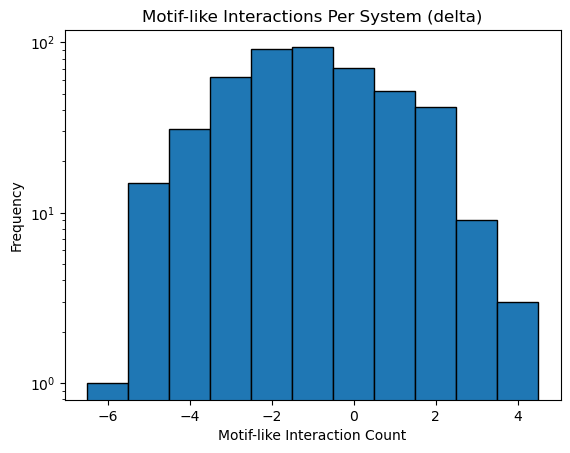

In [89]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

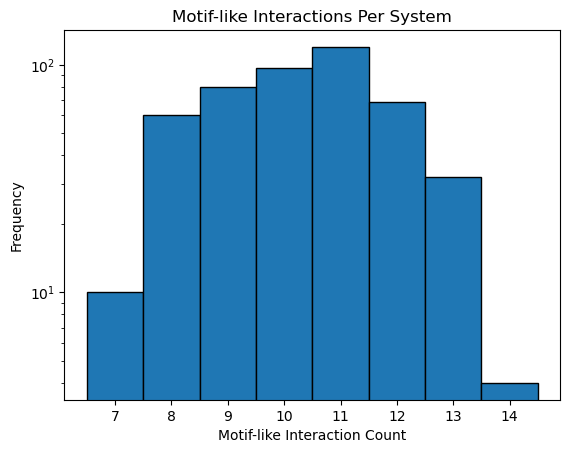

In [90]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare']
#set labels and title
plt.xlabel('Motif-like Interaction Count')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

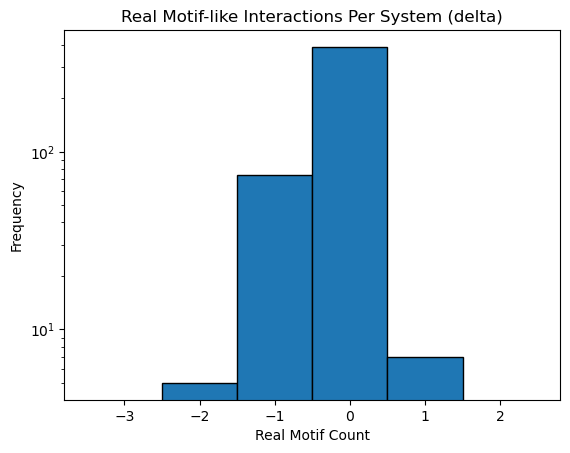

In [91]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_delta'] * df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-3.5, 3, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

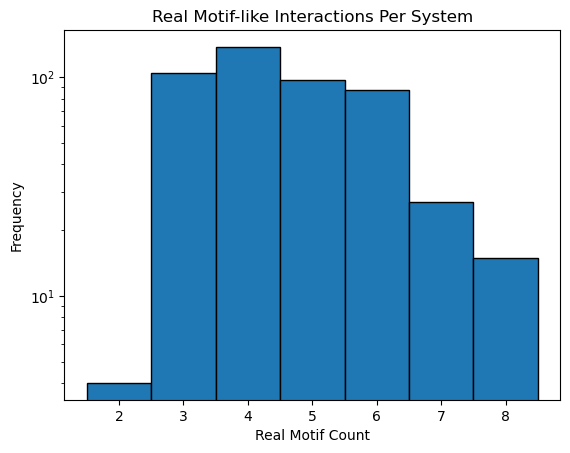

In [92]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['total_motifs_compare'] * df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Count')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(min(x) - 0.5, max(x) + 0.5, 1)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

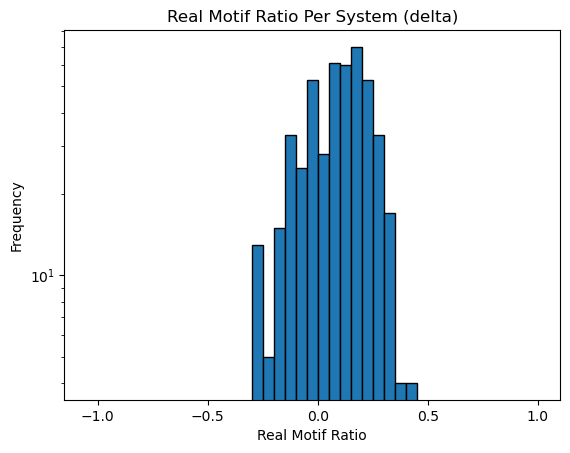

In [93]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_delta']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System (delta)')
#create 30 bin 1D hsitogram
bin_edges = np.arange(-1.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

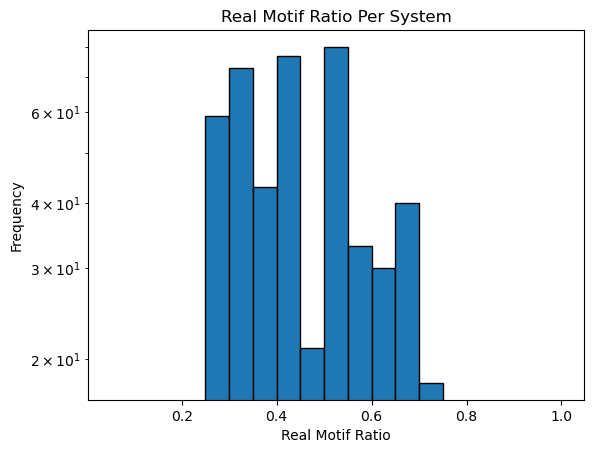

In [94]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['real_motif_ratio_compare']
#set labels and title
plt.xlabel('Real Motif Ratio')
plt.ylabel('Frequency')
plt.title('Real Motif Ratio Per System')
#create 30 bin 1D hsitogram
bin_edges = np.arange(0.05, 1.05, 0.05)
#plt.ylim(0,1000000)
#create 30 bin 1D hsitogram
plt.yscale('log')
plt.hist(x, bins=bin_edges, align = 'mid', edgecolor='black')

#set grid
#plt.grid(True)
#show plot
plt.show()

In [95]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
610,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000245631141/placements/7l1u_receptor_only_PV-000245631141_124_0.pdb,-11.400800,-15.663225,4.262425,8.0,11.0,-3.0,0,0,0.0,0.500000,0.272727,0.227273,0,3,-3.0,0.000000,-1.823431,1.823431,100,100,0.0,0,0,0.0,0,0,0.0,97.099200,96.786071,0.313129,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,2.841641,0.6,NaN,PV-000245631141
4607,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_63_2.pdb,-15.218895,-16.560445,1.341550,11.0,10.0,1.0,0,0,0.0,0.545455,0.400000,0.145455,2,3,-1.0,-0.890434,-1.326592,0.436158,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,95.512963,1.923163,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,2.582274,0.4,NaN,PV-000352087258
4623,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_93_3.pdb,-15.218895,-17.136100,1.917205,11.0,10.0,1.0,0,0,0.0,0.545455,0.300000,0.245455,2,3,-1.0,-0.890434,-1.624886,0.734452,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,94.539014,2.897112,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,1.409874,0.4,NaN,PV-000352087258
4635,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_136_4.pdb,-15.218895,-15.300858,0.081963,11.0,13.0,-2.0,0,0,0.0,0.545455,0.307692,0.237763,2,3,-1.0,-0.890434,-0.964363,0.073929,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,100.042471,-2.606345,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,1.718867,0.6,NaN,PV-000352087258
5758,/data/project/thymelab/triad_p

In [96]:
len(df_general_filtered)

491

In [97]:
#filter the general so that it only has the lowest ddg for each ligand
df_filtered = df_general_filtered.loc[df_general_filtered.groupby("ligand_name")["ddg_compare"].idxmin()]
df_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,ligand_initial,ligand_compare,ligand_delta,rmsd,improvement_ratio,Unnamed: 37,ligand_name
610,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000245631141/placements/7l1u_receptor_only_PV-000245631141_124_0.pdb,-11.400800,-15.663225,4.262425,8.0,11.0,-3.0,0,0,0.0,0.500000,0.272727,0.227273,0,3,-3.0,0.000000,-1.823431,1.823431,100,100,0.0,0,0,0.0,0,0,0.0,97.099200,96.786071,0.313129,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/8132/placements/7l1u_receptor_only_PV-000245631141_10_2.pdb,2.841641,0.6,NaN,PV-000245631141
4623,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000352087258/placements/7l1u_receptor_only_PV-000352087258_93_3.pdb,-15.218895,-17.136100,1.917205,11.0,10.0,1.0,0,0,0.0,0.545455,0.300000,0.245455,2,3,-1.0,-0.890434,-1.624886,0.734452,100,100,0.0,0,0,0.0,0,0,0.0,97.436126,94.539014,2.897112,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,/data/project/thymelab/triad_pulldown_tyr220/3908/placements/7l1u_receptor_only_PV-000352087258_7_6.pdb,1.409874,0.4,NaN,PV-000352087258
5758,/data/project/thymelab/triad_pulldown_tyr220/2588/placements/7l1u_receptor_only_PV-000404015422_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000404015422/placements/7l1u_receptor_only_PV-000404015422_32_0.pdb,-11.711153,-16.010401,4.299248,10.0,11.0,-1.0,0,0,0.0,0.500000,0.272727,0.227273,1,3,-2.0,-0.547062,-1.186898,0.639836,100,100,0.0,0,0,0.0,0,0,0.0,99.241785,97.075428,2.166357,/data/project/thymelab/triad_pulldown_tyr220/2588/placements/7l1u_receptor_only_PV-000404015422_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/2588/placements/7l1u_receptor_only_PV-000404015422_9_0.pdb,/data/project/thymelab/triad_pulldown_tyr220/2588/placements/7l1u_receptor_only_PV-000404015422_9_0.pdb,2.118371,0.6,NaN,PV-000404015422
9998,/data/project/thymelab/triad_pulldown_tyr220/5867/placements/7l1u_receptor_only_PV-000461684761_9_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/PV-000461684761/placements/7l1u_receptor_only_PV-000461684761_203_5.pdb,-11.552395,-15.856036,4.303641,8.0,11.0,-3.0,0,0,0.0,0.500000,0.363636,0.136364,1,3,-2.0,-0.420395,-1.630531,1.210136,100,100,0.0,0,0,0.0,0,0,0.0,97.527210,96.877069,0.650141,/data/project/thymelab/triad_pulldown_tyr220/5867/placements/7l1u_receptor_only_PV-000461684761_9_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/5867/placements/7l1u_receptor_only_PV-000461684761_9_2.pdb,/data/project/thymelab/triad_pulldown_tyr220/5867/placements/7l1u_receptor_only_PV-000461684761_9_2.pdb,1.945883,0.6,NaN,PV-000461684761
10486,/data/project/thymelab/triad_pu

In [98]:
# Extract ligand names using a regular expression
df_filtered['ligand_name'] = df_filtered['file_compare'].str.extract(r'7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_filtered['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000245631141' 'PV-000352087258' 'PV-000404015422' 'PV-000461684761'
 'PV-000461686602' 'PV-000548496444' 'PV-000548770824' 'PV-000584451295'
 'PV-001110468739' 'PV-001739169382' 'PV-002092424319' 'PV-002151672748'
 'PV-002159125044' 'PV-002264568885' 'PV-002990272316' 'PV-002991843603'
 'PV-003107974139' 'PV-003153818379' 'PV-003233863128' 'PV-003276841384'
 'PV-003288016736' 'PV-003354718848' 'PV-003389854278' 'PV-003540698920'
 'PV-003563572728' 'PV-003611820811' 'PV-003648343114' 'PV-003658707474'
 'PV-003669632782' 'PV-003703561896' 'PV-003930965565' 'PV-003968789845'
 'PV-003980565557' 'PV-004007583359' 'PV-004027752363' 'PV-004152162917'
 'PV-004157240875' 'PV-004234046384' 'PV-004277076181' 'PV-004280347164'
 'PV-004324593158' 'PV-004391052230' 'PV-004453948169' 'PV-004465679569'
 'PV-004502602930' 'PV-004502602931' 'PV-004525919406' 'PV-004544803254'
 'PV-004549836805' 'PV-004566728074' 'PV-004632783241' 'PV-004685827686'
 'PV-004725187006' 'PV-0047396

In [99]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [100]:
line_counter = 0
folder_counter = 0

destination = "/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_filtered.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_filtered.to_csv(destination + 'tyr_triad_refined_placements_half_real_best_improved_placements_sheet.csv', index=False)

00000_initial_7l1u_receptor_only_PV-000245631141_10_2.pdb 00000_compare_7l1u_receptor_only_PV-000245631141_124_0.pdb
00001_initial_7l1u_receptor_only_PV-000352087258_7_6.pdb 00001_compare_7l1u_receptor_only_PV-000352087258_93_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00002_initial_7l1u_receptor_only_PV-000404015422_9_0.pdb 00002_compare_7l1u_receptor_only_PV-000404015422_32_0.pdb
00003_initial_7l1u_receptor_only_PV-000461684761_9_2.pdb 00003_compare_7l1u_receptor_only_PV-000461684761_203_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00004_initial_7l1u_receptor_only_PV-000461686602_5_2.pdb 00004_compare_7l1u_receptor_only_PV-000461686602_205_1.pdb
00005_initial_7l1u_receptor_only_PV-000548496444_2_1.pdb 00005_compare_7l1u_receptor_only_PV-000548496444_163_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00006_initial_7l1u_receptor_only_PV-000548770824_4_0.pdb 00006_compare_7l1u_receptor_only_PV-000548770824_119_4.pdb
00007_initial_7l1u_receptor_only_PV-000584451295_14_0.pdb 00007_compare_7l1u_receptor_only_PV-000584451295_163_10.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00008_initial_7l1u_receptor_only_PV-001110468739_3_8.pdb 00008_compare_7l1u_receptor_only_PV-001110468739_126_8.pdb
00009_initial_7l1u_receptor_only_PV-001739169382_5_1.pdb 00009_compare_7l1u_receptor_only_PV-001739169382_158_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00010_initial_7l1u_receptor_only_PV-002092424319_1_42.pdb 00010_compare_7l1u_receptor_only_PV-002092424319_145_34.pdb
00011_initial_7l1u_receptor_only_PV-002151672748_8_0.pdb 00011_compare_7l1u_receptor_only_PV-002151672748_11_21.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00012_initial_7l1u_receptor_only_PV-002159125044_2_17.pdb 00012_compare_7l1u_receptor_only_PV-002159125044_127_8.pdb
00013_initial_7l1u_receptor_only_PV-002264568885_10_3.pdb 00013_compare_7l1u_receptor_only_PV-002264568885_24_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00014_initial_7l1u_receptor_only_PV-002990272316_3_4.pdb 00014_compare_7l1u_receptor_only_PV-002990272316_136_5.pdb
00015_initial_7l1u_receptor_only_PV-002991843603_10_0.pdb 00015_compare_7l1u_receptor_only_PV-002991843603_154_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00016_initial_7l1u_receptor_only_PV-003107974139_11_2.pdb 00016_compare_7l1u_receptor_only_PV-003107974139_168_0.pdb
00017_initial_7l1u_receptor_only_PV-003153818379_7_11.pdb 00017_compare_7l1u_receptor_only_PV-003153818379_22_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00018_initial_7l1u_receptor_only_PV-003233863128_12_0.pdb 00018_compare_7l1u_receptor_only_PV-003233863128_10_3.pdb
00019_initial_7l1u_receptor_only_PV-003276841384_14_1.pdb 00019_compare_7l1u_receptor_only_PV-003276841384_196_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00020_initial_7l1u_receptor_only_PV-003288016736_7_0.pdb 00020_compare_7l1u_receptor_only_PV-003288016736_226_5.pdb
00021_initial_7l1u_receptor_only_PV-003354718848_7_0.pdb 00021_compare_7l1u_receptor_only_PV-003354718848_59_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00022_initial_7l1u_receptor_only_PV-003389854278_8_1.pdb 00022_compare_7l1u_receptor_only_PV-003389854278_104_3.pdb
00023_initial_7l1u_receptor_only_PV-003540698920_4_12.pdb 00023_compare_7l1u_receptor_only_PV-003540698920_172_14.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00024_initial_7l1u_receptor_only_PV-003563572728_7_1.pdb 00024_compare_7l1u_receptor_only_PV-003563572728_184_2.pdb
00025_initial_7l1u_receptor_only_PV-003611820811_5_0.pdb 00025_compare_7l1u_receptor_only_PV-003611820811_135_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00026_initial_7l1u_receptor_only_PV-003648343114_4_2.pdb 00026_compare_7l1u_receptor_only_PV-003648343114_91_0.pdb
00027_initial_7l1u_receptor_only_PV-003658707474_1_4.pdb 00027_compare_7l1u_receptor_only_PV-003658707474_36_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00028_initial_7l1u_receptor_only_PV-003669632782_14_2.pdb 00028_compare_7l1u_receptor_only_PV-003669632782_214_2.pdb
00029_initial_7l1u_receptor_only_PV-003703561896_3_0.pdb 00029_compare_7l1u_receptor_only_PV-003703561896_193_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00030_initial_7l1u_receptor_only_PV-003930965565_3_0.pdb 00030_compare_7l1u_receptor_only_PV-003930965565_121_1.pdb
00031_initial_7l1u_receptor_only_PV-003968789845_7_0.pdb 00031_compare_7l1u_receptor_only_PV-003968789845_121_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00032_initial_7l1u_receptor_only_PV-003980565557_9_0.pdb 00032_compare_7l1u_receptor_only_PV-003980565557_117_5.pdb
00033_initial_7l1u_receptor_only_PV-004007583359_5_2.pdb 00033_compare_7l1u_receptor_only_PV-004007583359_98_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00034_initial_7l1u_receptor_only_PV-004027752363_2_0.pdb 00034_compare_7l1u_receptor_only_PV-004027752363_114_0.pdb
00035_initial_7l1u_receptor_only_PV-004152162917_10_5.pdb 00035_compare_7l1u_receptor_only_PV-004152162917_34_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00036_initial_7l1u_receptor_only_PV-004157240875_8_8.pdb 00036_compare_7l1u_receptor_only_PV-004157240875_51_1.pdb
00037_initial_7l1u_receptor_only_PV-004234046384_13_0.pdb 00037_compare_7l1u_receptor_only_PV-004234046384_145_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00038_initial_7l1u_receptor_only_PV-004277076181_11_0.pdb 00038_compare_7l1u_receptor_only_PV-004277076181_116_4.pdb
00039_initial_7l1u_receptor_only_PV-004280347164_2_0.pdb 00039_compare_7l1u_receptor_only_PV-004280347164_79_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00040_initial_7l1u_receptor_only_PV-004324593158_1_4.pdb 00040_compare_7l1u_receptor_only_PV-004324593158_111_0.pdb
00041_initial_7l1u_receptor_only_PV-004391052230_3_0.pdb 00041_compare_7l1u_receptor_only_PV-004391052230_142_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00042_initial_7l1u_receptor_only_PV-004453948169_5_1.pdb 00042_compare_7l1u_receptor_only_PV-004453948169_170_5.pdb
00043_initial_7l1u_receptor_only_PV-004465679569_12_4.pdb 00043_compare_7l1u_receptor_only_PV-004465679569_14_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00044_initial_7l1u_receptor_only_PV-004502602930_8_0.pdb 00044_compare_7l1u_receptor_only_PV-004502602930_240_0.pdb
00045_initial_7l1u_receptor_only_PV-004502602931_2_0.pdb 00045_compare_7l1u_receptor_only_PV-004502602931_240_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00046_initial_7l1u_receptor_only_PV-004525919406_1_2.pdb 00046_compare_7l1u_receptor_only_PV-004525919406_164_1.pdb
00047_initial_7l1u_receptor_only_PV-004544803254_10_0.pdb 00047_compare_7l1u_receptor_only_PV-004544803254_34_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/0’: File exists


00048_initial_7l1u_receptor_only_PV-004549836805_14_0.pdb 00048_compare_7l1u_receptor_only_PV-004549836805_215_4.pdb
00049_initial_7l1u_receptor_only_PV-004566728074_2_0.pdb 00049_compare_7l1u_receptor_only_PV-004566728074_142_0.pdb
00050_initial_7l1u_receptor_only_PV-004632783241_13_4.pdb 00050_compare_7l1u_receptor_only_PV-004632783241_107_1.pdb
00051_initial_7l1u_receptor_only_PV-004685827686_13_0.pdb 00051_compare_7l1u_receptor_only_PV-004685827686_187_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00052_initial_7l1u_receptor_only_PV-004725187006_14_2.pdb 00052_compare_7l1u_receptor_only_PV-004725187006_139_5.pdb
00053_initial_7l1u_receptor_only_PV-004739672490_13_1.pdb 00053_compare_7l1u_receptor_only_PV-004739672490_131_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00054_initial_7l1u_receptor_only_PV-004753680576_11_2.pdb 00054_compare_7l1u_receptor_only_PV-004753680576_34_4.pdb
00055_initial_7l1u_receptor_only_PV-004756359561_1_2.pdb 00055_compare_7l1u_receptor_only_PV-004756359561_22_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00056_initial_7l1u_receptor_only_PV-004784183830_9_0.pdb 00056_compare_7l1u_receptor_only_PV-004784183830_38_1.pdb
00057_initial_7l1u_receptor_only_PV-004851964689_2_9.pdb 00057_compare_7l1u_receptor_only_PV-004851964689_36_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00058_initial_7l1u_receptor_only_PV-004853140643_5_1.pdb 00058_compare_7l1u_receptor_only_PV-004853140643_20_6.pdb
00059_initial_7l1u_receptor_only_PV-004867393288_9_1.pdb 00059_compare_7l1u_receptor_only_PV-004867393288_6_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00060_initial_7l1u_receptor_only_PV-004871410414_7_1.pdb 00060_compare_7l1u_receptor_only_PV-004871410414_138_0.pdb
00061_initial_7l1u_receptor_only_PV-004891466475_12_1.pdb 00061_compare_7l1u_receptor_only_PV-004891466475_100_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00062_initial_7l1u_receptor_only_PV-004956800704_7_0.pdb 00062_compare_7l1u_receptor_only_PV-004956800704_212_6.pdb
00063_initial_7l1u_receptor_only_PV-004998578205_13_2.pdb 00063_compare_7l1u_receptor_only_PV-004998578205_203_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00064_initial_7l1u_receptor_only_PV-005104392044_5_2.pdb 00064_compare_7l1u_receptor_only_PV-005104392044_57_16.pdb
00065_initial_7l1u_receptor_only_PV-005203506540_6_4.pdb 00065_compare_7l1u_receptor_only_PV-005203506540_48_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00066_initial_7l1u_receptor_only_PV-005244746334_7_0.pdb 00066_compare_7l1u_receptor_only_PV-005244746334_53_2.pdb
00067_initial_7l1u_receptor_only_PV-005248999539_14_2.pdb 00067_compare_7l1u_receptor_only_PV-005248999539_153_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00068_initial_7l1u_receptor_only_PV-005257720122_7_0.pdb 00068_compare_7l1u_receptor_only_PV-005257720122_73_4.pdb
00069_initial_7l1u_receptor_only_PV-005266114365_9_7.pdb 00069_compare_7l1u_receptor_only_PV-005266114365_34_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00070_initial_7l1u_receptor_only_PV-005267636699_5_0.pdb 00070_compare_7l1u_receptor_only_PV-005267636699_21_2.pdb
00071_initial_7l1u_receptor_only_PV-005303877587_7_3.pdb 00071_compare_7l1u_receptor_only_PV-005303877587_29_14.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00072_initial_7l1u_receptor_only_PV-005305965262_12_3.pdb 00072_compare_7l1u_receptor_only_PV-005305965262_20_1.pdb
00073_initial_7l1u_receptor_only_PV-005345492516_1_1.pdb 00073_compare_7l1u_receptor_only_PV-005345492516_205_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00074_initial_7l1u_receptor_only_PV-005358178959_7_2.pdb 00074_compare_7l1u_receptor_only_PV-005358178959_24_6.pdb
00075_initial_7l1u_receptor_only_PV-005369140900_1_2.pdb 00075_compare_7l1u_receptor_only_PV-005369140900_234_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00076_initial_7l1u_receptor_only_PV-005402320308_10_3.pdb 00076_compare_7l1u_receptor_only_PV-005402320308_161_9.pdb
00077_initial_7l1u_receptor_only_PV-005429172396_11_5.pdb 00077_compare_7l1u_receptor_only_PV-005429172396_104_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00078_initial_7l1u_receptor_only_PV-005461421159_1_1.pdb 00078_compare_7l1u_receptor_only_PV-005461421159_220_23.pdb
00079_initial_7l1u_receptor_only_PV-005469614808_13_0.pdb 00079_compare_7l1u_receptor_only_PV-005469614808_72_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00080_initial_7l1u_receptor_only_PV-005494309855_5_0.pdb 00080_compare_7l1u_receptor_only_PV-005494309855_227_0.pdb
00081_initial_7l1u_receptor_only_PV-005497476510_2_1.pdb 00081_compare_7l1u_receptor_only_PV-005497476510_38_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00082_initial_7l1u_receptor_only_PV-005499336810_5_0.pdb 00082_compare_7l1u_receptor_only_PV-005499336810_12_1.pdb
00083_initial_7l1u_receptor_only_PV-005556623400_2_3.pdb 00083_compare_7l1u_receptor_only_PV-005556623400_26_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00084_initial_7l1u_receptor_only_PV-005563593091_7_0.pdb 00084_compare_7l1u_receptor_only_PV-005563593091_8_0.pdb
00085_initial_7l1u_receptor_only_PV-005589973613_3_1.pdb 00085_compare_7l1u_receptor_only_PV-005589973613_61_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00086_initial_7l1u_receptor_only_PV-005595951789_3_4.pdb 00086_compare_7l1u_receptor_only_PV-005595951789_35_1.pdb
00087_initial_7l1u_receptor_only_PV-005603135728_3_8.pdb 00087_compare_7l1u_receptor_only_PV-005603135728_24_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00088_initial_7l1u_receptor_only_PV-005638381602_8_0.pdb 00088_compare_7l1u_receptor_only_PV-005638381602_68_2.pdb
00089_initial_7l1u_receptor_only_PV-005658516608_4_2.pdb 00089_compare_7l1u_receptor_only_PV-005658516608_144_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00090_initial_7l1u_receptor_only_PV-005658647029_2_2.pdb 00090_compare_7l1u_receptor_only_PV-005658647029_18_2.pdb
00091_initial_7l1u_receptor_only_PV-005673971056_2_0.pdb 00091_compare_7l1u_receptor_only_PV-005673971056_166_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00092_initial_7l1u_receptor_only_PV-005803286992_3_0.pdb 00092_compare_7l1u_receptor_only_PV-005803286992_161_0.pdb
00093_initial_7l1u_receptor_only_PV-005834726450_13_0.pdb 00093_compare_7l1u_receptor_only_PV-005834726450_43_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00094_initial_7l1u_receptor_only_PV-005881878776_10_5.pdb 00094_compare_7l1u_receptor_only_PV-005881878776_62_1.pdb
00095_initial_7l1u_receptor_only_PV-006011734814_11_2.pdb 00095_compare_7l1u_receptor_only_PV-006011734814_39_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00096_initial_7l1u_receptor_only_PV-006030888838_2_0.pdb 00096_compare_7l1u_receptor_only_PV-006030888838_84_1.pdb
00097_initial_7l1u_receptor_only_PV-006081622719_4_0.pdb 00097_compare_7l1u_receptor_only_PV-006081622719_61_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/1’: File exists


00098_initial_7l1u_receptor_only_PV-006084505419_10_5.pdb 00098_compare_7l1u_receptor_only_PV-006084505419_87_0.pdb
00099_initial_7l1u_receptor_only_PV-006092191093_1_4.pdb 00099_compare_7l1u_receptor_only_PV-006092191093_149_0.pdb
00100_initial_7l1u_receptor_only_PV-006098929194_13_2.pdb 00100_compare_7l1u_receptor_only_PV-006098929194_51_1.pdb
00101_initial_7l1u_receptor_only_PV-006106409081_13_2.pdb 00101_compare_7l1u_receptor_only_PV-006106409081_62_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00102_initial_7l1u_receptor_only_PV-006120661025_9_3.pdb 00102_compare_7l1u_receptor_only_PV-006120661025_75_6.pdb
00103_initial_7l1u_receptor_only_PV-006134416639_4_5.pdb 00103_compare_7l1u_receptor_only_PV-006134416639_138_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00104_initial_7l1u_receptor_only_PV-006158748058_8_0.pdb 00104_compare_7l1u_receptor_only_PV-006158748058_176_7.pdb
00105_initial_7l1u_receptor_only_PV-006182486193_9_0.pdb 00105_compare_7l1u_receptor_only_PV-006182486193_105_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00106_initial_7l1u_receptor_only_PV-006270178146_1_9.pdb 00106_compare_7l1u_receptor_only_PV-006270178146_104_1.pdb
00107_initial_7l1u_receptor_only_PV-006299919516_13_1.pdb 00107_compare_7l1u_receptor_only_PV-006299919516_28_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00108_initial_7l1u_receptor_only_PV-006303504856_3_2.pdb 00108_compare_7l1u_receptor_only_PV-006303504856_63_1.pdb
00109_initial_7l1u_receptor_only_PV-006392187725_11_0.pdb 00109_compare_7l1u_receptor_only_PV-006392187725_135_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00110_initial_7l1u_receptor_only_PV-006431170276_10_0.pdb 00110_compare_7l1u_receptor_only_PV-006431170276_116_8.pdb
00111_initial_7l1u_receptor_only_PV-006432144058_8_7.pdb 00111_compare_7l1u_receptor_only_PV-006432144058_211_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00112_initial_7l1u_receptor_only_PV-006443734340_11_0.pdb 00112_compare_7l1u_receptor_only_PV-006443734340_64_0.pdb
00113_initial_7l1u_receptor_only_PV-006448074130_6_8.pdb 00113_compare_7l1u_receptor_only_PV-006448074130_27_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00114_initial_7l1u_receptor_only_PV-006465395816_11_0.pdb 00114_compare_7l1u_receptor_only_PV-006465395816_54_2.pdb
00115_initial_7l1u_receptor_only_PV-006469423672_13_2.pdb 00115_compare_7l1u_receptor_only_PV-006469423672_31_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00116_initial_7l1u_receptor_only_PV-006486524134_3_9.pdb 00116_compare_7l1u_receptor_only_PV-006486524134_178_0.pdb
00117_initial_7l1u_receptor_only_PV-006507906452_12_0.pdb 00117_compare_7l1u_receptor_only_PV-006507906452_114_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00118_initial_7l1u_receptor_only_PV-006509474047_1_1.pdb 00118_compare_7l1u_receptor_only_PV-006509474047_103_0.pdb
00119_initial_7l1u_receptor_only_PV-006518635968_6_4.pdb 00119_compare_7l1u_receptor_only_PV-006518635968_152_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00120_initial_7l1u_receptor_only_PV-006542967212_4_14.pdb 00120_compare_7l1u_receptor_only_PV-006542967212_84_13.pdb
00121_initial_7l1u_receptor_only_PV-006546220228_5_1.pdb 00121_compare_7l1u_receptor_only_PV-006546220228_1_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00122_initial_7l1u_receptor_only_PV-006551392530_11_0.pdb 00122_compare_7l1u_receptor_only_PV-006551392530_222_3.pdb
00123_initial_7l1u_receptor_only_PV-006558455467_11_1.pdb 00123_compare_7l1u_receptor_only_PV-006558455467_180_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00124_initial_7l1u_receptor_only_PV-006580232738_11_0.pdb 00124_compare_7l1u_receptor_only_PV-006580232738_98_3.pdb
00125_initial_7l1u_receptor_only_PV-006581419350_5_9.pdb 00125_compare_7l1u_receptor_only_PV-006581419350_228_14.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00126_initial_7l1u_receptor_only_PV-006584281297_10_3.pdb 00126_compare_7l1u_receptor_only_PV-006584281297_132_1.pdb
00127_initial_7l1u_receptor_only_PV-006610687141_9_3.pdb 00127_compare_7l1u_receptor_only_PV-006610687141_189_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00128_initial_7l1u_receptor_only_PV-006617671339_6_0.pdb 00128_compare_7l1u_receptor_only_PV-006617671339_113_9.pdb
00129_initial_7l1u_receptor_only_PV-006651007152_1_1.pdb 00129_compare_7l1u_receptor_only_PV-006651007152_184_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00130_initial_7l1u_receptor_only_PV-006677697938_3_2.pdb 00130_compare_7l1u_receptor_only_PV-006677697938_20_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00131_initial_7l1u_receptor_only_PV-006685182652_14_0.pdb 00131_compare_7l1u_receptor_only_PV-006685182652_62_1.pdb
00132_initial_7l1u_receptor_only_PV-006707620008_12_0.pdb 00132_compare_7l1u_receptor_only_PV-006707620008_115_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00133_initial_7l1u_receptor_only_Z1004601974_9_19.pdb 00133_compare_7l1u_receptor_only_Z1004601974_82_0.pdb
00134_initial_7l1u_receptor_only_Z108646532_2_0.pdb 00134_compare_7l1u_receptor_only_Z108646532_104_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00135_initial_7l1u_receptor_only_Z1178732826_6_1.pdb 00135_compare_7l1u_receptor_only_Z1178732826_168_4.pdb
00136_initial_7l1u_receptor_only_Z1231419893_3_4.pdb 00136_compare_7l1u_receptor_only_Z1231419893_43_21.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00137_initial_7l1u_receptor_only_Z1276000409_6_13.pdb 00137_compare_7l1u_receptor_only_Z1276000409_124_3.pdb
00138_initial_7l1u_receptor_only_Z1361240709_11_6.pdb 00138_compare_7l1u_receptor_only_Z1361240709_105_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00139_initial_7l1u_receptor_only_Z1438098873_4_4.pdb 00139_compare_7l1u_receptor_only_Z1438098873_36_25.pdb
00140_initial_7l1u_receptor_only_Z1438139395_3_20.pdb 00140_compare_7l1u_receptor_only_Z1438139395_169_19.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00141_initial_7l1u_receptor_only_Z1515081752_11_6.pdb 00141_compare_7l1u_receptor_only_Z1515081752_37_4.pdb
00142_initial_7l1u_receptor_only_Z1545605998_8_12.pdb 00142_compare_7l1u_receptor_only_Z1545605998_52_28.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00143_initial_7l1u_receptor_only_Z1577906123_8_4.pdb 00143_compare_7l1u_receptor_only_Z1577906123_80_3.pdb
00144_initial_7l1u_receptor_only_Z1591834331_10_4.pdb 00144_compare_7l1u_receptor_only_Z1591834331_164_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00145_initial_7l1u_receptor_only_Z1666614365_10_0.pdb 00145_compare_7l1u_receptor_only_Z1666614365_64_4.pdb
00146_initial_7l1u_receptor_only_Z1677750783_9_1.pdb 00146_compare_7l1u_receptor_only_Z1677750783_167_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00147_initial_7l1u_receptor_only_Z1740919902_13_2.pdb 00147_compare_7l1u_receptor_only_Z1740919902_41_0.pdb
00148_initial_7l1u_receptor_only_Z1768807450_2_4.pdb 00148_compare_7l1u_receptor_only_Z1768807450_55_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/2’: File exists


00149_initial_7l1u_receptor_only_Z1783498655_14_0.pdb 00149_compare_7l1u_receptor_only_Z1783498655_5_1.pdb
00150_initial_7l1u_receptor_only_Z1881329597_4_1.pdb 00150_compare_7l1u_receptor_only_Z1881329597_76_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00151_initial_7l1u_receptor_only_Z1898960497_5_0.pdb 00151_compare_7l1u_receptor_only_Z1898960497_88_1.pdb
00152_initial_7l1u_receptor_only_Z1919250237_1_1.pdb 00152_compare_7l1u_receptor_only_Z1919250237_94_17.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00153_initial_7l1u_receptor_only_Z1928425500_6_3.pdb 00153_compare_7l1u_receptor_only_Z1928425500_111_0.pdb
00154_initial_7l1u_receptor_only_Z1939520100_11_1.pdb 00154_compare_7l1u_receptor_only_Z1939520100_61_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00155_initial_7l1u_receptor_only_Z2107702115_3_18.pdb 00155_compare_7l1u_receptor_only_Z2107702115_60_3.pdb
00156_initial_7l1u_receptor_only_Z2166521128_3_2.pdb 00156_compare_7l1u_receptor_only_Z2166521128_195_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00157_initial_7l1u_receptor_only_Z2168919582_8_5.pdb 00157_compare_7l1u_receptor_only_Z2168919582_25_18.pdb
00158_initial_7l1u_receptor_only_Z2173631286_3_2.pdb 00158_compare_7l1u_receptor_only_Z2173631286_42_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00159_initial_7l1u_receptor_only_Z2212817833_4_0.pdb 00159_compare_7l1u_receptor_only_Z2212817833_5_1.pdb
00160_initial_7l1u_receptor_only_Z2220056790_5_3.pdb 00160_compare_7l1u_receptor_only_Z2220056790_208_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00161_initial_7l1u_receptor_only_Z2275607993_13_8.pdb 00161_compare_7l1u_receptor_only_Z2275607993_128_23.pdb
00162_initial_7l1u_receptor_only_Z2295912689_2_6.pdb 00162_compare_7l1u_receptor_only_Z2295912689_14_8.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00163_initial_7l1u_receptor_only_Z2373486594_2_6.pdb 00163_compare_7l1u_receptor_only_Z2373486594_37_1.pdb
00164_initial_7l1u_receptor_only_Z2437444199_12_8.pdb 00164_compare_7l1u_receptor_only_Z2437444199_207_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00165_initial_7l1u_receptor_only_Z2437615025_6_3.pdb 00165_compare_7l1u_receptor_only_Z2437615025_149_4.pdb
00166_initial_7l1u_receptor_only_Z2479100152_6_29.pdb 00166_compare_7l1u_receptor_only_Z2479100152_121_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00167_initial_7l1u_receptor_only_Z2480226269_5_13.pdb 00167_compare_7l1u_receptor_only_Z2480226269_32_2.pdb
00168_initial_7l1u_receptor_only_Z2634963617_4_4.pdb 00168_compare_7l1u_receptor_only_Z2634963617_15_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00169_initial_7l1u_receptor_only_Z2636036522_9_1.pdb 00169_compare_7l1u_receptor_only_Z2636036522_128_18.pdb
00170_initial_7l1u_receptor_only_Z2642383399_3_0.pdb 00170_compare_7l1u_receptor_only_Z2642383399_110_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00171_initial_7l1u_receptor_only_Z2702015545_2_3.pdb 00171_compare_7l1u_receptor_only_Z2702015545_41_2.pdb
00172_initial_7l1u_receptor_only_Z2703211097_2_0.pdb 00172_compare_7l1u_receptor_only_Z2703211097_149_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00173_initial_7l1u_receptor_only_Z2773468118_3_14.pdb 00173_compare_7l1u_receptor_only_Z2773468118_42_7.pdb
00174_initial_7l1u_receptor_only_Z2774153976_4_5.pdb 00174_compare_7l1u_receptor_only_Z2774153976_48_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00175_initial_7l1u_receptor_only_Z2836248538_2_3.pdb 00175_compare_7l1u_receptor_only_Z2836248538_14_14.pdb
00176_initial_7l1u_receptor_only_Z2843470765_1_9.pdb 00176_compare_7l1u_receptor_only_Z2843470765_38_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00177_initial_7l1u_receptor_only_Z2892860854_1_5.pdb 00177_compare_7l1u_receptor_only_Z2892860854_168_1.pdb
00178_initial_7l1u_receptor_only_Z2910706406_11_0.pdb 00178_compare_7l1u_receptor_only_Z2910706406_213_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00179_initial_7l1u_receptor_only_Z2918317555_14_4.pdb 00179_compare_7l1u_receptor_only_Z2918317555_72_3.pdb
00180_initial_7l1u_receptor_only_Z2951396873_12_0.pdb 00180_compare_7l1u_receptor_only_Z2951396873_42_2.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00181_initial_7l1u_receptor_only_Z2956314337_9_2.pdb 00181_compare_7l1u_receptor_only_Z2956314337_21_3.pdb
00182_initial_7l1u_receptor_only_Z2982457989_7_5.pdb 00182_compare_7l1u_receptor_only_Z2982457989_104_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00183_initial_7l1u_receptor_only_Z3008570270_8_9.pdb 00183_compare_7l1u_receptor_only_Z3008570270_154_3.pdb
00184_initial_7l1u_receptor_only_Z3092315043_6_14.pdb 00184_compare_7l1u_receptor_only_Z3092315043_209_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00185_initial_7l1u_receptor_only_Z3093808477_8_16.pdb 00185_compare_7l1u_receptor_only_Z3093808477_156_8.pdb
00186_initial_7l1u_receptor_only_Z3174606746_7_1.pdb 00186_compare_7l1u_receptor_only_Z3174606746_13_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00187_initial_7l1u_receptor_only_Z3211364930_1_5.pdb 00187_compare_7l1u_receptor_only_Z3211364930_53_4.pdb
00188_initial_7l1u_receptor_only_Z3347931473_1_11.pdb 00188_compare_7l1u_receptor_only_Z3347931473_61_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00189_initial_7l1u_receptor_only_Z3357526120_6_0.pdb 00189_compare_7l1u_receptor_only_Z3357526120_154_11.pdb
00190_initial_7l1u_receptor_only_Z3364736680_9_1.pdb 00190_compare_7l1u_receptor_only_Z3364736680_88_14.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00191_initial_7l1u_receptor_only_Z3388578784_8_38.pdb 00191_compare_7l1u_receptor_only_Z3388578784_125_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00192_initial_7l1u_receptor_only_Z342156196_6_3.pdb 00192_compare_7l1u_receptor_only_Z342156196_40_8.pdb
00193_initial_7l1u_receptor_only_Z3474884733_9_15.pdb 00193_compare_7l1u_receptor_only_Z3474884733_207_13.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00194_initial_7l1u_receptor_only_Z3543341587_11_27.pdb 00194_compare_7l1u_receptor_only_Z3543341587_86_3.pdb
00195_initial_7l1u_receptor_only_Z3583874891_6_3.pdb 00195_compare_7l1u_receptor_only_Z3583874891_20_16.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00196_initial_7l1u_receptor_only_Z3608091075_11_1.pdb 00196_compare_7l1u_receptor_only_Z3608091075_115_0.pdb
00197_initial_7l1u_receptor_only_Z3620455926_14_0.pdb 00197_compare_7l1u_receptor_only_Z3620455926_164_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/3’: File exists


00198_initial_7l1u_receptor_only_Z3622612101_6_1.pdb 00198_compare_7l1u_receptor_only_Z3622612101_49_3.pdb
00199_initial_7l1u_receptor_only_Z3622784830_1_0.pdb 00199_compare_7l1u_receptor_only_Z3622784830_120_1.pdb
00200_initial_7l1u_receptor_only_Z3627379579_4_1.pdb 00200_compare_7l1u_receptor_only_Z3627379579_59_2.pdb
00201_initial_7l1u_receptor_only_Z3800023540_2_1.pdb 00201_compare_7l1u_receptor_only_Z3800023540_26_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00202_initial_7l1u_receptor_only_Z3818294399_8_14.pdb 00202_compare_7l1u_receptor_only_Z3818294399_159_4.pdb
00203_initial_7l1u_receptor_only_Z3820931212_4_4.pdb 00203_compare_7l1u_receptor_only_Z3820931212_105_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00204_initial_7l1u_receptor_only_Z3837405575_14_2.pdb 00204_compare_7l1u_receptor_only_Z3837405575_12_4.pdb
00205_initial_7l1u_receptor_only_Z3842073369_11_6.pdb 00205_compare_7l1u_receptor_only_Z3842073369_50_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00206_initial_7l1u_receptor_only_Z3846546235_3_4.pdb 00206_compare_7l1u_receptor_only_Z3846546235_17_0.pdb
00207_initial_7l1u_receptor_only_Z3941779646_8_12.pdb 00207_compare_7l1u_receptor_only_Z3941779646_69_9.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00208_initial_7l1u_receptor_only_Z4001185266_4_4.pdb 00208_compare_7l1u_receptor_only_Z4001185266_134_4.pdb
00209_initial_7l1u_receptor_only_Z4031439330_11_10.pdb 00209_compare_7l1u_receptor_only_Z4031439330_88_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00210_initial_7l1u_receptor_only_Z4147574655_4_10.pdb 00210_compare_7l1u_receptor_only_Z4147574655_112_3.pdb
00211_initial_7l1u_receptor_only_Z4177731850_7_9.pdb 00211_compare_7l1u_receptor_only_Z4177731850_167_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00212_initial_7l1u_receptor_only_Z4187659559_11_3.pdb 00212_compare_7l1u_receptor_only_Z4187659559_129_7.pdb
00213_initial_7l1u_receptor_only_Z4207083377_12_10.pdb 00213_compare_7l1u_receptor_only_Z4207083377_85_0.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00214_initial_7l1u_receptor_only_Z4216693220_7_1.pdb 00214_compare_7l1u_receptor_only_Z4216693220_59_3.pdb
00215_initial_7l1u_receptor_only_Z4250922693_10_0.pdb 00215_compare_7l1u_receptor_only_Z4250922693_8_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00216_initial_7l1u_receptor_only_Z4261658176_6_0.pdb 00216_compare_7l1u_receptor_only_Z4261658176_92_18.pdb
00217_initial_7l1u_receptor_only_Z4275426112_9_6.pdb 00217_compare_7l1u_receptor_only_Z4275426112_56_16.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00218_initial_7l1u_receptor_only_Z4284884659_6_2.pdb 00218_compare_7l1u_receptor_only_Z4284884659_193_1.pdb
00219_initial_7l1u_receptor_only_Z4316815252_15_2.pdb 00219_compare_7l1u_receptor_only_Z4316815252_101_6.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00220_initial_7l1u_receptor_only_Z4342755496_3_3.pdb 00220_compare_7l1u_receptor_only_Z4342755496_47_0.pdb
00221_initial_7l1u_receptor_only_Z4352650098_6_19.pdb 00221_compare_7l1u_receptor_only_Z4352650098_82_7.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00222_initial_7l1u_receptor_only_Z4353659317_3_10.pdb 00222_compare_7l1u_receptor_only_Z4353659317_48_0.pdb
00223_initial_7l1u_receptor_only_Z4402339076_9_3.pdb 00223_compare_7l1u_receptor_only_Z4402339076_114_4.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00224_initial_7l1u_receptor_only_Z4419360006_5_9.pdb 00224_compare_7l1u_receptor_only_Z4419360006_27_12.pdb
00225_initial_7l1u_receptor_only_Z4466938194_9_0.pdb 00225_compare_7l1u_receptor_only_Z4466938194_151_15.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00226_initial_7l1u_receptor_only_Z4645233482_5_19.pdb 00226_compare_7l1u_receptor_only_Z4645233482_16_10.pdb
00227_initial_7l1u_receptor_only_Z4665591673_6_1.pdb 00227_compare_7l1u_receptor_only_Z4665591673_6_3.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00228_initial_7l1u_receptor_only_Z4771777388_6_5.pdb 00228_compare_7l1u_receptor_only_Z4771777388_60_7.pdb
00229_initial_7l1u_receptor_only_Z4964289510_12_2.pdb 00229_compare_7l1u_receptor_only_Z4964289510_133_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00230_initial_7l1u_receptor_only_Z4975094598_4_2.pdb 00230_compare_7l1u_receptor_only_Z4975094598_45_2.pdb
00231_initial_7l1u_receptor_only_Z4978882307_8_3.pdb 00231_compare_7l1u_receptor_only_Z4978882307_173_5.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists
mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


00232_initial_7l1u_receptor_only_Z4993921751_5_3.pdb 00232_compare_7l1u_receptor_only_Z4993921751_213_5.pdb
00233_initial_7l1u_receptor_only_Z5011221388_2_12.pdb 00233_compare_7l1u_receptor_only_Z5011221388_67_1.pdb


mkdir: cannot create directory ‘/data/project/thymelab/triad_pulldown_tyr220/refined_placements/half_real/placements_for_pymol/4’: File exists


In [81]:
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv('/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/agonist_real/agonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)